# SYSTEM REKOMENDASI PARIWISATA. Colaborative Filtering

## Import Library

In [ ]:
# Untuk mengupload file
import os

# Untuk mengolah dataset
import pandas as pd
import numpy as np
from zipfile import ZipFile
from pathlib import Path

# Untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_palette('Set1')
sns.set()

# Untuk pemodelan
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Concatenate
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json

# Untuk Load Model
from tensorflow.keras.models import load_model
import joblib

# Untuk menghilangkan warnings saat plotting seaborn
import warnings
warnings.filterwarnings('ignore')



## Load Dataset


### Upload File CSV jika ada dataset baru

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving dataset_lokasi.csv to dataset_lokasi.csv
Saving dataset_rating.csv to dataset_rating.csv
Saving dataset_user.csv to dataset_user.csv


In [ ]:
# Load
import pandas as pd

# tourism = pd.read_csv('bigdata.csv', encoding='utf-8')
rating = pd.read_csv('dataset_rating.csv')
place = pd.read_csv('dataset_lokasi.csv')
user = pd.read_csv('dataset_user.csv')

## Data Exploring

*   List item
*   List item



In [ ]:
#Cek data duplikat jika diperlukan
duplicate_rows_df = place[place.duplicated()]
print("Data duplikat : ")
print(duplicate_rows_df)

Data duplikat : 
Empty DataFrame
Columns: [Place_Id, Place_Name, City, Images, Price, Rating, DorN, Coordinate, Lat, Long, Category, Description]
Index: []


### Eksplorasi Dataset

#### Data Lokasi / Place

In [ ]:
place.head()

,Place_Id,Place_Name,City,Images,Price,Rating,DorN,Coordinate,Lat,Long,Category,Description
0,1,Monumen Nasional,Jakarta,https://www.iwarebatik.org/wp-content/uploads/...,20000,4.6,D,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,Budaya,Monumen Nasional atau yang populer disingkat d...
1,2,Kota Tua,Jakarta,https://akcdn.detik.net.id/visual/2020/09/01/k...,0,4.6,D,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,Budaya,"Kota tua di Jakarta, yang juga bernama Kota Tu..."
2,3,Dunia Fantasi,Jakarta,https://s-light.tiket.photos/t/01E25EBZS3W0FY9...,270000,4.6,N,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,Taman Hiburan,Dunia Fantasi atau disebut juga Dufan adalah t...
3,4,Taman Mini Indonesia Indah (TMII),Jakarta,https://akcdn.detik.net.id/visual/2021/04/08/w...,10000,4.5,D,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,Taman Hiburan,Taman Mini Indonesia Indah merupakan suatu kaw...
4,5,Atlantis Water Adventure,Jakarta,https://www.ancol.com/shared/images/5d3f526e-5...,94000,4.5,D,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,Taman Hiburan,Atlantis Water Adventure atau dikenal dengan A...


In [ ]:
# Membuang kolom yang tidak dipakai jika diperlukan

#place = place.drop(['NAMA KOLOM'],axis=1)
#place.head()

In [ ]:
# Cek jumlah tempat wisata pada setiap kota
place.City.value_counts(ascending = False)

Yogyakarta    126
Bandung       124
Jakarta        84
Semarang       57
Surabaya       46
Name: City, dtype: int64

##### Mengubah Kota Tujuan

In [ ]:
# Merubah data agar hanya dari Kota Spesifik
#Belum di Implement, jika ingin di implement cek bagian "Mengubah Data Rating Sesuai Kota"
place_s = place[place['City']=='Yogyakarta']
place_s[:130]
#place.all

,Place_Id,Place_Name,City,Images,Price,Rating,DorN,Coordinate,Lat,Long,Category,Description
84,85,Taman Pintar Yogyakarta,Yogyakarta,https://moneyinsight-news.com/wp-content/uploa...,6000,4.5,D,"{'lat': -7.800671500000001, 'lng': 110.3676551}",-7.800671,110.367655,Taman Hiburan,Taman Pintar Yogyakarta (bahasa Jawa: Hanacara...
85,86,Keraton Yogyakarta,Yogyakarta,https://anekatempatwisata.com/wp-content/uploa...,15000,4.6,D,"{'lat': -7.8052845, 'lng': 110.3642031}",-7.805284,110.364203,Budaya,Keraton Ngayogyakarta Hadiningrat atau Keraton...
86,87,Sindu Kusuma Edupark (SKE),Yogyakarta,https://visitingjogja.jogjaprov.go.id/web/wp-c...,20000,4.2,N,"{'lat': -7.767297300000001, 'lng': 110.3542486}",-7.767297,110.354249,Taman Hiburan,Sindu Kusuma Edupark (SKE) merupakan sebuah de...
87,88,Museum Benteng Vredeburg Yogyakarta,Yogyakarta,https://upload.wikimedia.org/wikipedia/commons...,3000,4.6,D,"{'lat': -7.800201599999999, 'lng': 110.3663044}",-7.800202,110.366304,Budaya,Museum Benteng Vredeburg (bahasa Jawa: ꦩꦸꦱꦶꦪꦸꦩ...
88,89,De Mata Museum Jogja,Yogyakarta,https://www.gudeg.net/cni-content/uploads/modu...,50000,4.4,D,"{'lat': -7.816315599999999, 'lng': 110.3871442}",-7.816316,110.387144,Budaya,Museum De Mata merupakan salah satu museum yan...
...,...,...,...,...,...,...,...,...,...,...,...,...
205,206,Wisata Kaliurang,Yogyakarta,https://images.tokopedia.net/blog-tokopedia-co...,8000,4.4,D,"{'lat': -7.6120675, 'lng': 110.4205209}",-7.612068,110.420521,Cagar Alam,"Jogja selalu menarik untuk dikulik, terlebih t..."
206,207,Heha Sky View,Yogyakarta,https://media.suara.com/pictures/970x544/2019/...,15000,4.4,N,"{'lat': -7.8496144, 'lng': 110.478324}",-7.849614,110.478324,Taman Hiburan,HeHa Sky View adalah salah satu tempat wisata ...
207,208,Taman Sungai Mudal,Yogyakarta,https://garasijogja.com/wp-content/uploads/201...,10000,4.6,D,"{'lat': -7.762813599999998, 'lng': 110.1161626}",-7.762814,110.116163,Cagar Alam,"Taman Sungai Mudal, sebuah objek wisata alam t..."
208,209,Pantai Sanglen,Yogyakarta,https://www.nativeindonesia.com/foto/pantai-sa...,10000,4.5,D,"{'lat': -8.1367456, 'lng': 110.5716362}",-8.136746,110.571636,Bahari,Pantai Sanglen. Lokasinya berada di Desa Kemad...


#### Data Rating

In [ ]:
# melihat gambaran data rating

rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [ ]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


##### Mengubah Data Rating Sesuai Kota

In [ ]:
# Merubah data rating agar hanya berisi rating pada tempat wisata dari Kota Spesifik

rating = pd.merge(rating, place[['Place_Id']], how='right', on='Place_Id') #Jika implement kota spesifik => place ganti place_s
rating.head()

,User_Id,Place_Id,Place_Ratings
0,36,1,4
1,38,1,2
2,64,1,2
3,74,1,2
4,86,1,4


In [ ]:
# Melihat ukuran dataset rating untuk Kota Spesifik

rating.shape

(2871, 3)

#### Data User

In [ ]:
# Melihat gambaran data user

user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


##### Mengubah Data User Sesuai Kota

In [ ]:
# Merubah data user agar hanya berisi user yang pernah megunjungi wisata di Kota Spesifik

user = pd.merge(user, rating[['User_Id']], how='right', on='User_Id').drop_duplicates().sort_values('User_Id')
user.head()

,User_Id,Location,Age
83,1,"Semarang, Jawa Tengah",20
18,2,"Bekasi, Jawa Barat",21
345,3,"Cirebon, Jawa Barat",23
62,4,"Bekasi, Jawa Barat",21
63,5,"Lampung, Sumatera Selatan",20


In [ ]:
# Melihat dataset user yang pernah memberi rating pada wisata di Kota Bandung

user.shape

(300, 3)

## Visualisasi Data

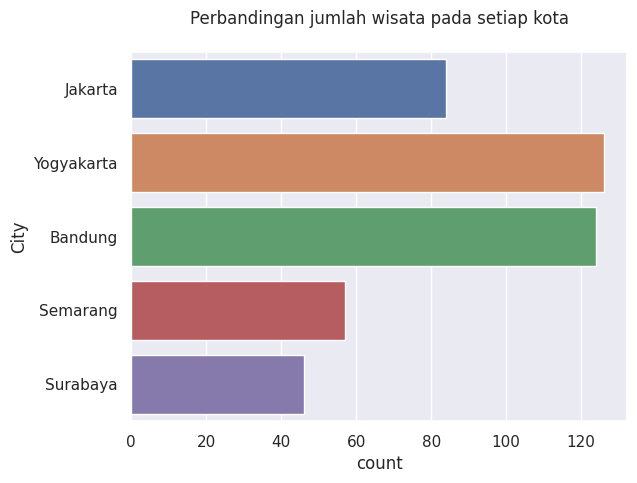

In [ ]:
sns.countplot(y='City', data=place)
plt.title('Perbandingan jumlah wisata pada setiap kota', pad=20)
plt.show()

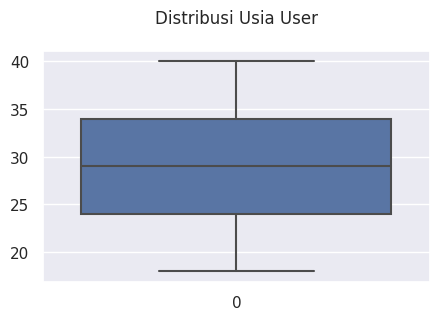

In [ ]:
# Membuat visualisasi distribusi usia user

plt.figure(figsize=(5,3))
sns.boxplot(user['Age']);
plt.title('Distribusi Usia User', pad=20)
plt.show()

Text(0.5, 1.0, 'Distribusi Harga Masuk Wisata')

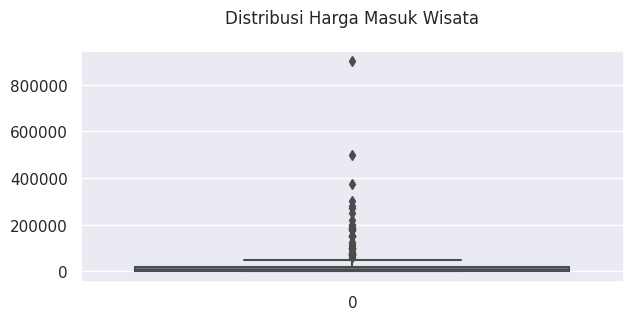

In [ ]:
# Membuat visualisasi distribusi harga masuk tempat wisata

plt.figure(figsize=(7,3))
sns.boxplot(place['Price'])
plt.title('Distribusi Harga Masuk Wisata', pad=20)
#plt.show()

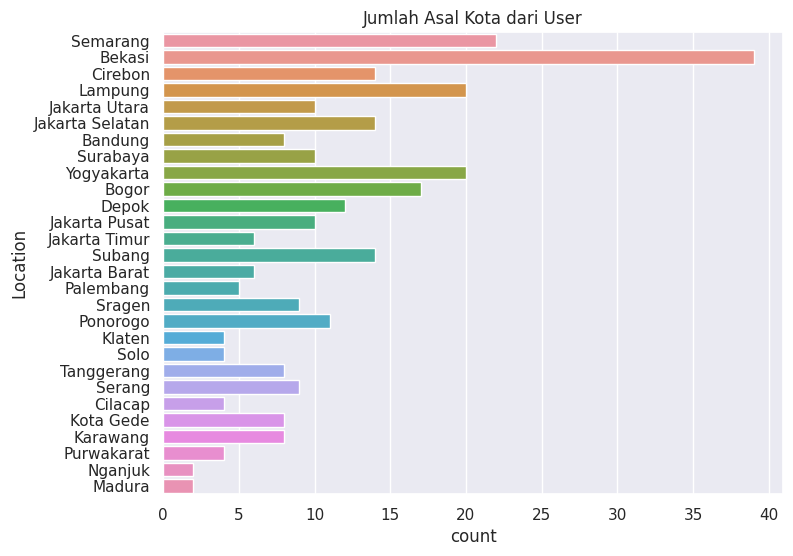

In [ ]:
# Memfilter asal kota dari user
osas = user['Location'].apply(lambda x: str(x).split(',')[0]) #rubah ke str -> possible untuk di split

# Visualisasi asal kota dari user
plt.figure(figsize=(8,6))
sns.countplot(y = osas)
plt.title('Jumlah Asal Kota dari User')
plt.show()

## Prepare Pembuatan Model

#### Salin Data Rating

In [ ]:
# Membaca dataset untuk dilakukan encoding

df = rating.copy()
df.head()

,User_Id,Place_Id,Place_Ratings
0,36,1,4
1,38,1,2
2,64,1,2
3,74,1,2
4,86,1,4


#### Encode Data

##### Membuat Fungsi Encode

In [ ]:
def dict_encoder(col, data=df):

  # Mengubah kolom suatu dataframe menjadi list tanpa nilai yang sama
  unique_val = data[col].unique().tolist()

  # Melakukan encoding value kolom suatu dataframe ke angka
  val_to_val_encoded = {x: i for i, x in enumerate(unique_val)}

  # Melakukan proses encoding angka ke value dari kolom suatu dataframe
  val_encoded_to_val = {i: x for i, x in enumerate(unique_val)}
  return val_to_val_encoded, val_encoded_to_val

##### Encoding dan Mapping Kolom User

In [ ]:
# Encoding User_Id
user_to_user_encoded, user_encoded_to_user = dict_encoder('User_Id')

# Mapping User_Id ke dataframe
df['user'] = df['User_Id'].map(user_to_user_encoded)

##### Encoding dan Mapping kolom Place

In [ ]:
# Encoding Place_Id
place_to_place_encoded, place_encoded_to_place = dict_encoder('Place_Id')

# Mapping Place_Id ke dataframe place
df['place'] = df['Place_Id'].map(place_to_place_encoded)

#### Cek Data Pemodelan

In [ ]:
# Mendapatkan jumlah user dan place
num_users, num_place = len(user_to_user_encoded), len(place_to_place_encoded)

# Mengubah rating menjadi nilai float
df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)

# Mendapatkan nilai minimum dan maksimum rating
min_rating, max_rating = min(df['Place_Ratings']), max(df['Place_Ratings'])

print(f'Number of User: {num_users}, Number of Place: {num_place}, Min Rating: {min_rating}, Max Rating: {max_rating}')

Number of User: 300, Number of Place: 437, Min Rating: 1.0, Max Rating: 5.0


In [ ]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df.head(2)

,User_Id,Place_Id,Place_Ratings,user,place
6252,203,274,2.0,36,273
4684,126,206,5.0,112,205


## Pemodelan ML (RecommenderNet)

#### Membagi Data Train dan Test

In [ ]:
# Membuat variabel x untuk mencocokkan data user dan place menjadi satu value
x = df[['user', 'place']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 70% data train dan 30% data validasi
train_indices = int(0.7 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

#### Train Model

##### Inisiasi Model

In [ ]:
from sklearn.model_selection import train_test_split
#model = tf.keras.Sequential()
#x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1, random_state=42)

EMBEDDING_SIZE = 100

class RecommenderNet(tf.keras.Model):
  def __init__(self, num_users, num_place, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_place = num_place
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.places_embedding = layers.Embedding(
        num_place,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.places_bias = layers.Embedding(num_place, 1)

    # Additional layers
    self.concat_layer = Concatenate()
    self.dense_1 = Dense(128, activation='relu')
    self.dropout_1 = Dropout(0.2)
    self.batch_norm_1 = BatchNormalization()
    self.dense_2 = Dense(64, activation='relu')
    self.dropout_2 = Dropout(0.2)
    self.batch_norm_2 = BatchNormalization()
    self.dense_output = Dense(1, activation='sigmoid')

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    places_vector = self.places_embedding(inputs[:, 1])
    places_bias = self.places_bias(inputs[:, 1])

    # Concatenate the embeddings
    x = self.concat_layer([user_vector, places_vector])

    # Add one or more hidden layers
    x = self.dense_1(x)
    x = self.dropout_1(x)
    x = self.batch_norm_1(x)
    x = self.dense_2(x)
    x = self.dropout_2(x)
    x = self.batch_norm_2(x)

    # Output layer
    x = self.dense_output(x)
    return x
    #return tf.nn.sigmoid(x)

model = RecommenderNet(num_users, num_place, EMBEDDING_SIZE)
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.0001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)



##### Training Proses

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size=64,
    epochs = 100,
    verbose=1,
    validation_data = (x_val, y_val)
)


Epoch 1/100


110/110 [==============================] - 2s 5ms/step - loss: 0.8491 - root_mean_squared_error: 0.4177 - val_loss: 0.6945 - val_root_mean_squared_error: 0.3444
Epoch 2/100
110/110 [==============================] - 0s 4ms/step - loss: 0.8090 - root_mean_squared_error: 0.4022 - val_loss: 0.6956 - val_root_mean_squared_error: 0.3452
Epoch 3/100
110/110 [==============================] - 0s 3ms/step - loss: 0.7825 - root_mean_squared_error: 0.3921 - val_loss: 0.6976 - val_root_mean_squared_error: 0.3466
Epoch 4/100
110/110 [==============================] - 0s 4ms/step - loss: 0.7715 - root_mean_squared_error: 0.3873 - val_loss: 0.7014 - val_root_mean_squared_error: 0.3492
Epoch 5/100
110/110 [==============================] - 0s 4ms/step - loss: 0.7427 - root_mean_squared_error: 0.3707 - val_loss: 0.7079 - val_root_mean_squared_error: 0.3534
Epoch 6/100
110/110 [==============================] - 1s 5ms/step - loss: 0.7335 - root_mean_squared_error: 0.3664 - val_loss: 0.7145 - val_root_m

##### Plotting

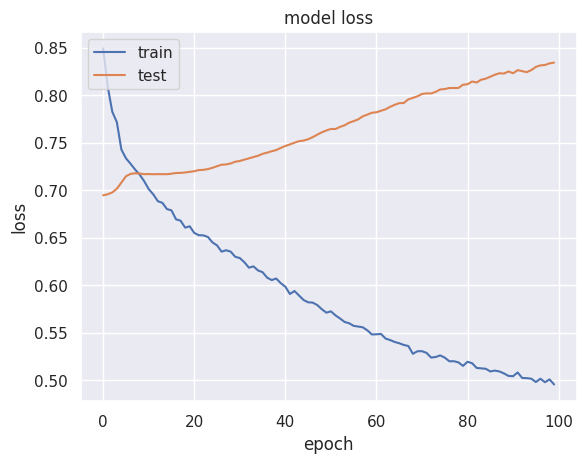

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##### Convert Model

In [ ]:
#model .pb
model.save('capstone_model', save_format='tf')

In [ ]:
#model .h5
model.save_weights('model.h5')

In [ ]:
#model .pkl
joblib.dump(model, 'modelfix')

['modelfix']

In [ ]:
import pickle

with open('model','wb') as r:
  pickle.dump(model,r)

In [ ]:
osas = joblib.load('model')

##### Cek Load Model

In [ ]:
#load .h5
model.load_weights("model.h5")
print("Model Berhasil Di Load")

Model Berhasil Di Load


In [ ]:
#load .pkl
model = joblib.load('model.pkl')
print("Model Berhasil Di Load")

Model Berhasil Di Load


In [ ]:
modelload = model.load_weights("model.h5")

## Testing Model

#### Menyiapkan Dataframe

In [ ]:
place_df = place[['Place_Id','Place_Name','Category','Rating','Price', 'City', 'Lat', 'Long']]
place_df.columns = ['id','place_name','category','rating','price', 'city', 'lat', 'long']
place_df[:20] #Cek isi place_df
#df = rating.copy()

,id,place_name,category,rating,price,city,lat,long
0,1,Monumen Nasional,Budaya,4.6,20000,Jakarta,-6.175392,106.827153
1,2,Kota Tua,Budaya,4.6,0,Jakarta,-6.137645,106.817125
2,3,Dunia Fantasi,Taman Hiburan,4.6,270000,Jakarta,-6.125312,106.833538
3,4,Taman Mini Indonesia Indah (TMII),Taman Hiburan,4.5,10000,Jakarta,-6.302446,106.895156
4,5,Atlantis Water Adventure,Taman Hiburan,4.5,94000,Jakarta,-6.124190,106.839134
5,6,Taman Impian Jaya Ancol,Taman Hiburan,4.5,25000,Jakarta,-6.117333,106.857995
6,7,Kebun Binatang Ragunan,Cagar Alam,4.5,4000,Jakarta,-6.312459,106.820187
7,8,Ocean Ecopark,Taman Hiburan,4.0,180000,Jakarta,-6.125802,106.836325
8,9,Pelabuhan Marina,Bahari,4.4,175000,Jakarta,1.078880,103.931398
9,10,Pulau Tidung,Bahari,4.5,150000,Jakarta,-5.803205,106.523791


#### Mengambil Sample User

In [ ]:
user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

#### Cek wisata yang belum dikunjungi

In [ ]:
# Membuat data lokasi yang belum dikunjungi user
place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user.Place_Id.values)]['id']
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)

place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

#### Print Output Rekomendasi

In [ ]:
hari = int(input("Input lama hari berkunjung : "))

# 1 hari berwisata => berkunjung ke 3 tempat
hari_h = hari * 3

print(hari_h)

Input lama hari berkunjung : 2
6


In [ ]:
# Mengambil data rekomendasi
ratings = model.predict(user_place_array).flatten()
top_ratings_indices = ratings.argsort()[-hari_h:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]


#Menampilkan data wisata yang di sukai user
print('Daftar rekomendasi untuk: {}'.format('User ' + str(user_id)))
print('===' * 15,'\n')
print('----' * 15)
print('Tempat dengan rating wisata paling tinggi dari user')
print('----' * 15)

top_place_user = (
    place_visited_by_user.sort_values(by = 'Place_Ratings', ascending=False).head(5).Place_Id.values
)
place_df_rows = place_df[place_df['id'].isin(top_place_user)]
for row in place_df_rows.itertuples():
    print(row.place_name, ':', row.category, ':', row.city )

#Menampilkan data wisata rekomendasi untuk user
print('')
print('----' * 15)

recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
for row, i in zip(recommended_place.itertuples(), range(1,14)):
    print(i,'.', row.place_name, '\n', 'Kategori Wisata : ', row.category, '\n', 'Harga Tiket Masuk : ', row.price, '\n', 'Rating Wisata : ', row.rating, '\n', 'Lokasi Wisata : ', row.city, '\n', 'Lat : ', row.lat, '\n', 'Long : ', row.long)

print('==='*15)


4/4 [==============================] - 0s 4ms/step
Daftar rekomendasi untuk: User 56

------------------------------------------------------------
Tempat dengan rating wisata paling tinggi dari user
------------------------------------------------------------
Tugu Pal Putih Jogja : Taman Hiburan : Yogyakarta
Grojogan Watu Purbo Bangunrejo : Taman Hiburan : Yogyakarta
Goa Cerme : Cagar Alam : Yogyakarta
Candi Borobudur : Budaya : Yogyakarta
Pantai Glagah : Bahari : Yogyakarta

------------------------------------------------------------
1 . Nol Kilometer Jl.Malioboro 
 Kategori Wisata :  Taman Hiburan 
 Harga Tiket Masuk :  0 
 Rating Wisata :  4.7 
 Lokasi Wisata :  Yogyakarta 
 Lat :  -7.8013803 
 Long :  110.3647652
2 . Sumur Gumuling 
 Kategori Wisata :  Taman Hiburan 
 Harga Tiket Masuk :  7000 
 Rating Wisata :  4.5 
 Lokasi Wisata :  Yogyakarta 
 Lat :  -7.8087911 
 Long :  110.3591825
3 . Monumen Sanapati 
 Kategori Wisata :  Budaya 
 Harga Tiket Masuk :  15000 
 Rating Wisata :

In [ ]:
from google.colab import drive
drive.mount('/content/drive')